# 04. Model VGG - Transfer Learning e Fine_Tuning

### Importando os arquivos do projeto no Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando as bibliotecas

In [2]:
import sys
import os
from pathlib import Path
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset

In [4]:
df = keras.datasets.cifar10 # Armazenando o dataset em uma variável

In [5]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [6]:
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
] # Definindo uma legenda para as classes

### Definindo o modelo Keras a partir de um pipeline

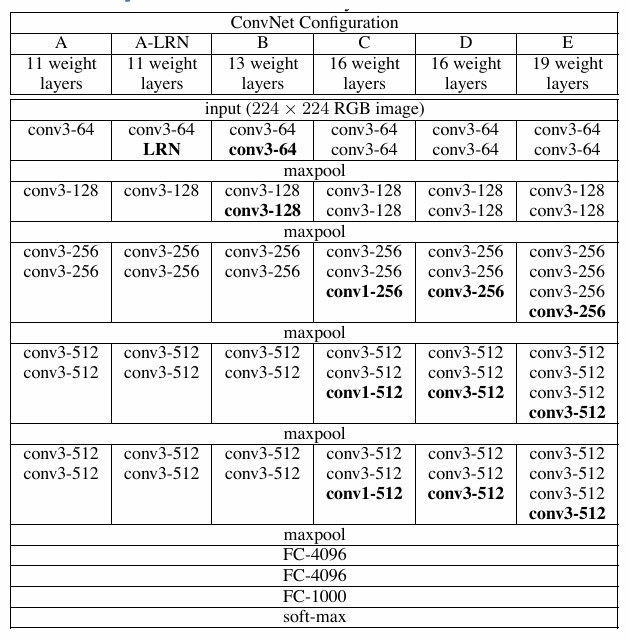

In [7]:
display(Image('/content/drive/MyDrive/Colab Notebooks/ds_projeto_final_10_modelo_classificacao_imagens_site_buscas/images/VGG.jpg')) # Exibindo a referência VGG

In [8]:
############ Configurações utilizadas ###############

# Primeiro treinamento
LEARNING_RATE = 1E-3
EPOCHS = 10
BATCH_SIZE = 256

# Fine_tuning
LEARNING_RATE_TUNING = 1E-3
EPOCHS_TUNING = 15
BATCH_SIZE_TUNING = 128

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input # Importando o modelo treinado VGG19 e as etapas de pré processamento necessárias

base_model = VGG19(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3)) # Armazenando o modelo VGG19 em uma variável

base_model.trainable = False # Definindo que não é para esse modelo ser treinado

base_model.summary() # Exibindo o resumo do treinamento

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [10]:
# Etapa inicial
model = keras.models.Sequential() # Instanciando o modelo

# Etapas de pré processamento
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3))) # Passando o shape dos dados para o modelo

# Etapas de transferência de aprendizado
model.add(base_model) # Passando o modelo VGG19 já treinado

# Etapas de camadas ocultas
model.add(keras.layers.GlobalMaxPooling2D()) # Realizando a redução de dimensionalidade/achatamento
model.add(keras.layers.Dense(4096, activation='relu')) # Passando a camada de sáida
model.add(keras.layers.Dropout(0.5)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Dense(4096, activation='relu')) # Passando a camada de sáida
model.add(keras.layers.Dropout(0.5)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Dense(10, activation='softmax')) # Passando a camada de sáida (10 = valores de resultados possíveis (0 a 9))

model.summary(show_trainable=True) # Exibindo o resumo do treinamento

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ vgg19 (Functional)                  │ (None, 1, 1, 512)            │    20,024,384 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_max_pooling2d                │ (None, 512)                  │             0 │    -    │
│ (GlobalMaxPooling2D)                │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 4096)                 │     2,101,248 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 4096)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 4096)                 │    16,781,312 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_1 (Dropout)                 │ (None, 4096)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 10)                   │        40,970 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 38,947,914 (148.57 MB)

 Trainable params: 18,923,530 (72.19 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Compilando o modelo

In [11]:
optimizer = keras.optimizers.Adam(LEARNING_RATE) # Definindo o otimizador
loss = keras.losses.SparseCategoricalCrossentropy() # Definindo a função de busca
metric = keras.metrics.SparseCategoricalAccuracy() # Definindo a métrica a ser considerada durante o treinamento

model.compile(optimizer=optimizer, loss=loss, metrics=[metric]) # Compilando o modelo

### Treinando o modelo

**Obs:** como o tempo de treinamento do modelo estava extremamente alto, tive que fazer alterações: epochs de 300 para 10 e start_from_epoch de 150 para 1

In [12]:
x_train_preprocess = preprocess_input(x_train) # Fazendo o pré processamento no x de treino
x_test_preprocess = preprocess_input(x_test) # Fazendo o pré processamento no x de teste

In [13]:
early_stop = keras.callbacks.EarlyStopping( # Configurando um callback que interrompe o treinamento do modelo caso o desempenho pare de melhorar, com base em métricas monitoradas
    patience = 5, # Definindo o patience, que é o número de epochs consecutivas em que a métrica monitorada pode não melhorar antes de interromper o treinamento
    verbose = 1, # Definindo o verbose para exibir a informação de quando o callback for acionado caso aconteça
    min_delta = 1E-4, # Definindo a menor diferença aceitável para considerar que houve melhora em uma métrica monitorada
    start_from_epoch = 1 # Definindo a epoch mínimo em que o early stop será executado
)

history = model.fit( # Treinando o modelo e armazenando o seu resultado em uma variável
    x_train_preprocess, # Passando os valores de x de treino
    y_train, # Passando os valores de y de treino
    epochs = EPOCHS, # Definindo o número máximo de epochs, ou seja, quantas vezes o modelo passará por todo o conjunto de treino durante o ajuste
    batch_size = BATCH_SIZE, # Definindo o batch size, que é o número de amostras processadas de uma só vez antes de atualizar os pesos do modelo
    validation_split = 0.2, # Definindo a proporção dos dados de treino que será separada para validação
    # callbacks = [early_stop] # Definindo o callback com a condição de parada definida anteriormente para interromper o treinamento do modelo
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - loss: 10.1878 - sparse_categorical_accuracy: 0.4359 - val_loss: 1.1339 - val_sparse_categorical_accuracy: 0.6194
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 1.1196 - sparse_categorical_accuracy: 0.6140 - val_loss: 1.0743 - val_sparse_categorical_accuracy: 0.6338
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 1.0161 - sparse_categorical_accuracy: 0.6484 - val_loss: 1.0454 - val_sparse_categorical_accuracy: 0.6496
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.9533 - sparse_categorical_accuracy: 0.6696 - val_loss: 1.0461 - val_sparse_categorical_accuracy: 0.6524
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.9030 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.9975 - val_sparse_categorical_accuracy: 0.6639
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.8569 - sparse_categorical_accuracy: 0.6996 - val_loss: 0.9956 - val_sparse_categorical_accuracy: 0

### Fazendo o evaluate do modelo

In [14]:
model.evaluate(x_test_preprocess, y_test) # Fazendo o evaluate do modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.0221 - sparse_categorical_accuracy: 0.6561


[1.0357760190963745, 0.651199996471405]

### Verificando possíveis condições de overfitting

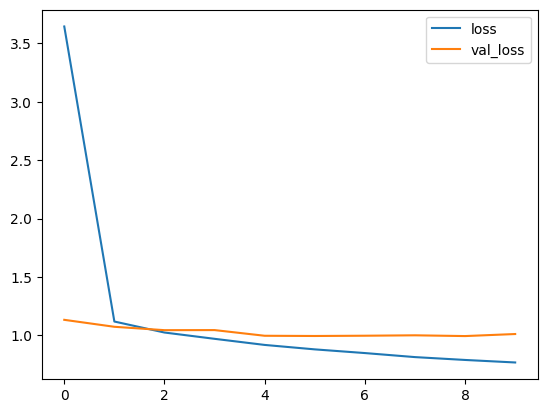

In [15]:
plt.plot(history.history['loss'], label='loss') # Plotando os valores de treino
plt.plot(history.history['val_loss'], label='val_loss') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

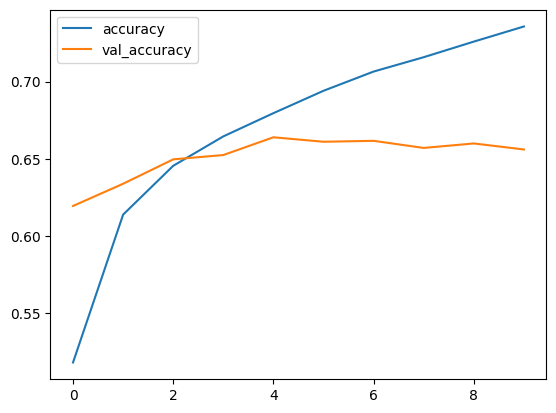

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy') # Plotando os valores de treino
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

Nesse cenário, após a aplicação do pré processamento de Data Augmentation, os índicios de overfitting não aparecem mais, deixando assim o modelo pronto para ser utilizado com os dados reais.

### Fazendo o predict do modelo com uma amostra dos dados

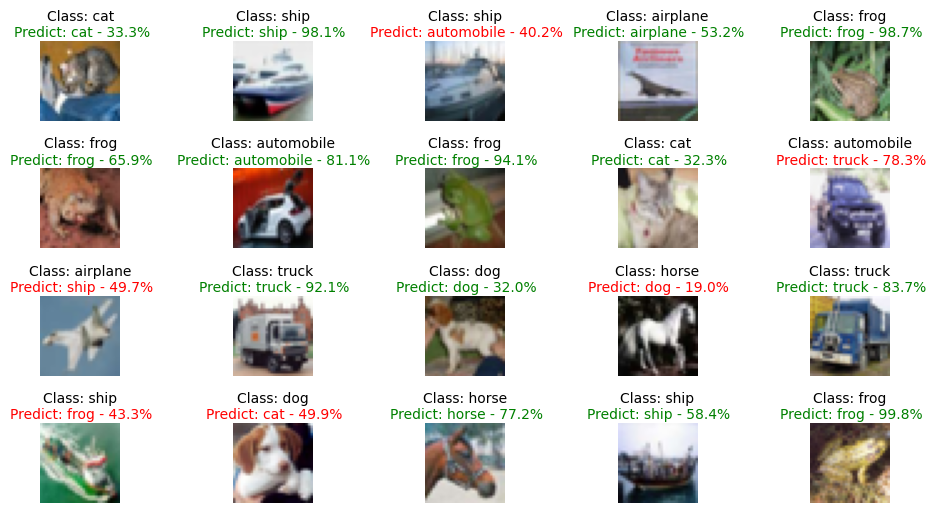

In [17]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_test[i]) # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Class: {class_names[y_test[i][0]]}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test_preprocess[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        16, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Predict: {class_names[pred.argmax()]} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == y_test[i] else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Aplicando Fine-Tuning ao modelo

In [20]:
base_model.trainable = True # Definindo que não é para esse modelo ser treinado

base_model.summary(show_trainable = True) # Exibindo o resumo do treinamento

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer (InputLayer)            │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv1 (Conv2D)               │ (None, 32, 32, 64)           │         1,792 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv2 (Conv2D)               │ (None, 32, 32, 64)           │        36,928 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_pool (MaxPooling2D)          │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv1 (Conv2D)               │ (None, 16, 16, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv2 (Conv2D)               │ (None, 16, 16, 128)          │       147,584 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_pool (MaxPooling2D)          │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv1 (Conv2D)               │ (None, 8, 8, 256)            │       295,168 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv2 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv3 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv4 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_pool (MaxPooling2D)          │ (None, 4, 4, 256)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv1 (Conv2D)               │ (None, 4, 4, 512)            │     1,180,160 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv2 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv3 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv4 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_pool (MaxPooling2D)          │ (None, 2, 2, 512)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv1 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv2 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv3 (Conv2D)

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE_TUNING) # Definindo o otimizador
loss = keras.losses.SparseCategoricalCrossentropy() # Definindo a função de busca
metric = keras.metrics.SparseCategoricalAccuracy() # Definindo a métrica a ser considerada durante o treinamento

model.compile(optimizer=optimizer, loss=loss, metrics=[metric]) # Compilando o modelo

In [22]:
history = model.fit( # Treinando o modelo e armazenando o seu resultado em uma variável
    x_train_preprocess, # Passando os valores de x de treino
    y_train, # Passando os valores de y de treino
    epochs = EPOCHS_TUNING, # Definindo o número máximo de epochs, ou seja, quantas vezes o modelo passará por todo o conjunto de treino durante o ajuste
    batch_size = BATCH_SIZE_TUNING, # Definindo o batch size, que é o número de amostras processadas de uma só vez antes de atualizar os pesos do modelo
    validation_split = 0.2, # Definindo a proporção dos dados de treino que será separada para validação
    # callbacks = [early_stop] # Definindo o callback com a condição de parada definida anteriormente para interromper o treinamento do modelo
)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 123ms/step - loss: 8.9704 - sparse_categorical_accuracy: 0.1550 - val_loss: 1.9077 - val_sparse_categorical_accuracy: 0.2277
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 87ms/step - loss: 1.8727 - sparse_categorical_accuracy: 0.2268 - val_loss: 1.7705 - val_sparse_categorical_accuracy: 0.2764
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - loss: 1.7532 - sparse_categorical_accuracy: 0.2775 - val_loss: 1.5837 - val_sparse_categorical_accuracy: 0.3379
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - loss: 1.5657 - sparse_categorical_accuracy: 0.3616 - val_loss: 1.3524 - val_sparse_categorical_accuracy: 0.4380
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - loss: 1.3632 - sparse_categorical_accuracy: 0.4498 - val_loss: 1.2728 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 1.2016 - sparse_categorical_accuracy: 0.5417 - val_loss: 1.1188 - val_sparse_categorical_accuracy

In [23]:
model.evaluate(x_test_preprocess, y_test) # Fazendo o evaluate do modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7892 - sparse_categorical_accuracy: 0.7517


[0.8061171174049377, 0.7443000078201294]

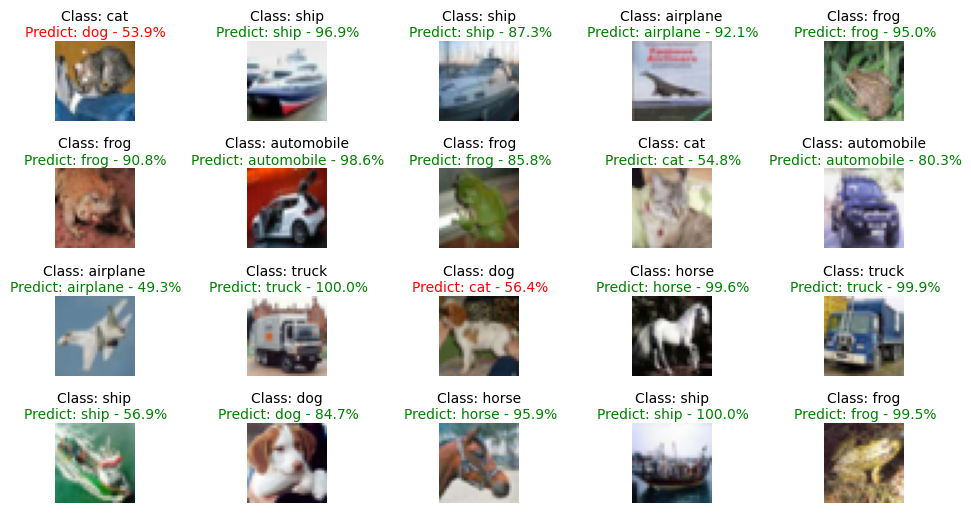

In [24]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_test[i]) # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Class: {class_names[y_test[i][0]]}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test_preprocess[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        16, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Predict: {class_names[pred.argmax()]} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == y_test[i] else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos